In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import os
from tensorflow import keras
from tensorflow.keras import layers

import matplotlib.image as img
import seaborn as sns

# setting seed
seed = 0
np.random.seed(seed)
tf.random.set_seed(seed)

Here's a breakdown:

seed = 0: This initializes a variable called seed with a value of 0. You can choose any integer as a seed; it just needs to be consistent across runs to ensure reproducibility.

np.random.seed(seed): This sets the seed for NumPy's random number generator. By using a fixed seed, you ensure that any random numbers generated using NumPy will be the same each time you run the code. This is crucial when you're performing operations that involve randomness, such as shuffling datasets or generating random samples.

tf.random.set_seed(seed): This does the same thing for TensorFlow's random number generation. It ensures that any randomness in TensorFlow (like initializing weights or performing random operations) will yield the same results each time you run the code, provided the environment and other conditions remain unchanged.

In [ ]:
import zipfile

zip_files = ['train', 'test1']

for zip_file in zip_files:
    with zipfile.ZipFile(f'{zip_file}.zip', 'r') as zip_ref:
        zip_ref.extractall(".")
        print(f'{zip_file} extracted successfully.')

train extracted successfully.
test1 extracted successfully.


The code snippet you provided is a Python script that uses the zipfile module to extract ZIP files. Here’s a step-by-step explanation of what each part does:

import zipfile: This line imports the zipfile module, which provides tools for creating, reading, writing, and extracting ZIP files.

zip_files = ['train', 'test1']: This line creates a list called zip_files containing the names of the ZIP files to be extracted. In this case, it includes 'train' and 'test1'. The actual ZIP files are expected to be named train.zip and test1.zip.

for zip_file in zip_files:: This line starts a loop that will iterate over each name in the zip_files list. For each iteration, the variable zip_file will take on the value of the current item in the list.

with zipfile.ZipFile(f'{zip_file}.zip', 'r') as zip_ref:: This line opens the ZIP file for reading. The f'{zip_file}.zip' syntax is an f-string that constructs the filename by appending .zip to the current zip_file name. The with statement ensures that the file is properly closed after its block is executed. The opened ZIP file is assigned to the variable zip_ref.

zip_ref.extractall("."): This method extracts all the contents of the ZIP file to the current directory (denoted by "."). If you wanted to extract to a different directory, you could replace "." with a path to that directory.

print(f'{zip_file} extracted successfully.'): After the extraction, this line prints a message indicating that the ZIP file was extracted successfully. It uses an f-string to insert the current zip_file name into the message.

In [ ]:
train_dir = '/content/train.zip'
test_dir = '/content/test1.zip'

In [ ]:
import os

train_dir = '/content/train' # remove .zip extension. Assumes you have extracted the zip file.
file_name = os.listdir(train_dir)
print('There are {} images in the directory.'.format(len(file_name)))




There are 25000 images in the directory.


In [ ]:
# we convert these images into data frame
def to_Dataframe(file_names):
  files, labels = list(), list()
  for file in file_names:
    files.append(file)
    labels.append(file[:3])
    df= pd.DataFrame({'file_name': files, 'label': labels})
  return df


In [ ]:
df = to_Dataframe(file_name)

In [ ]:
df.head()

,file_name,label
0,dog.1755.jpg,dog
1,cat.2150.jpg,cat
2,dog.10119.jpg,dog
3,dog.5534.jpg,dog
4,dog.20.jpg,dog


In [ ]:
file_name

['dog.1755.jpg',
 'cat.2150.jpg',
 'dog.10119.jpg',
 'dog.5534.jpg',
 'dog.20.jpg',
 'dog.12016.jpg',
 'cat.4321.jpg',
 'cat.5892.jpg',
 'dog.4377.jpg',
 'dog.2472.jpg',
 'dog.12237.jpg',
 'dog.10482.jpg',
 'cat.10197.jpg',
 'cat.8921.jpg',
 'cat.11629.jpg',
 'dog.3154.jpg',
 'cat.9611.jpg',
 'dog.7854.jpg',
 'cat.5384.jpg',
 'cat.12358.jpg',
 'dog.868.jpg',
 'cat.5359.jpg',
 'cat.5945.jpg',
 'cat.5095.jpg',
 'cat.7490.jpg',
 'cat.7820.jpg',
 'dog.5747.jpg',
 'cat.10142.jpg',
 'dog.6339.jpg',
 'dog.3106.jpg',
 'dog.8780.jpg',
 'cat.379.jpg',
 'dog.1931.jpg',
 'cat.10892.jpg',
 'cat.4906.jpg',
 'dog.4560.jpg',
 'dog.1483.jpg',
 'dog.12193.jpg',
 'cat.10384.jpg',
 'cat.1904.jpg',
 'cat.3847.jpg',
 'dog.4755.jpg',
 'dog.5548.jpg',
 'cat.2248.jpg',
 'dog.3664.jpg',
 'cat.958.jpg',
 'dog.10989.jpg',
 'dog.6144.jpg',
 'dog.1308.jpg',
 'cat.10708.jpg',
 'cat.7404.jpg',
 'dog.7425.jpg',
 'cat.6678.jpg',
 'cat.5468.jpg',
 'dog.7001.jpg',
 'dog.10718.jpg',
 'dog.11970.jpg',
 'dog.7120.jpg',
 'ca

In [ ]:
pd.DataFrame(file_name)

,0
0,dog.1755.jpg
1,cat.2150.jpg
2,dog.10119.jpg
3,dog.5534.jpg
4,dog.20.jpg
...,...
24995,dog.10776.jpg
24996,dog.7737.jpg
24997,cat.2717.jpg
24998,dog.10919.jpg


# analyze the data


Data set label distribution:
 label
dog    12500
cat    12500
Name: count, dtype: int64


<ipython-input-13-2cbd368d9deb>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['label'], palette='viridis')


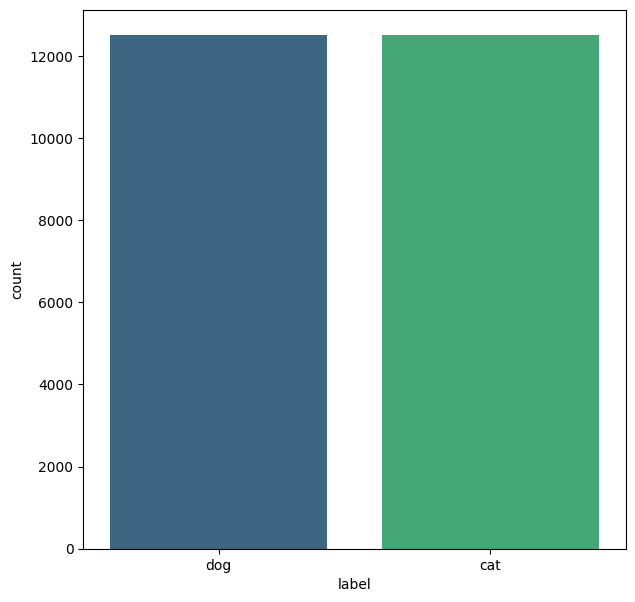

In [ ]:
print("Data set label distribution:\n",df['label'].value_counts())

plt.figure(figsize=(7,7))
sns.countplot(x=df['label'], palette='viridis')
plt.show()

In [ ]:
cat = [file for file in file_name if file[:3] == 'cat']
dog = [file for file in file_name if file[:3] == 'dog']

(354, 239, 3)


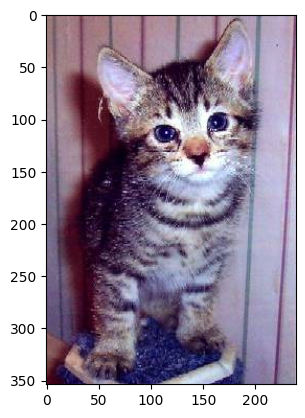

In [ ]:
# randonly print a cat image
im = img.imread('./train/cat.8031.jpg')
print(im.shape)
plt.imshow(im)
plt.show()

#Randomly print Image


(494, 427, 3)
(300, 199, 3)
(465, 431, 3)
(375, 499, 3)


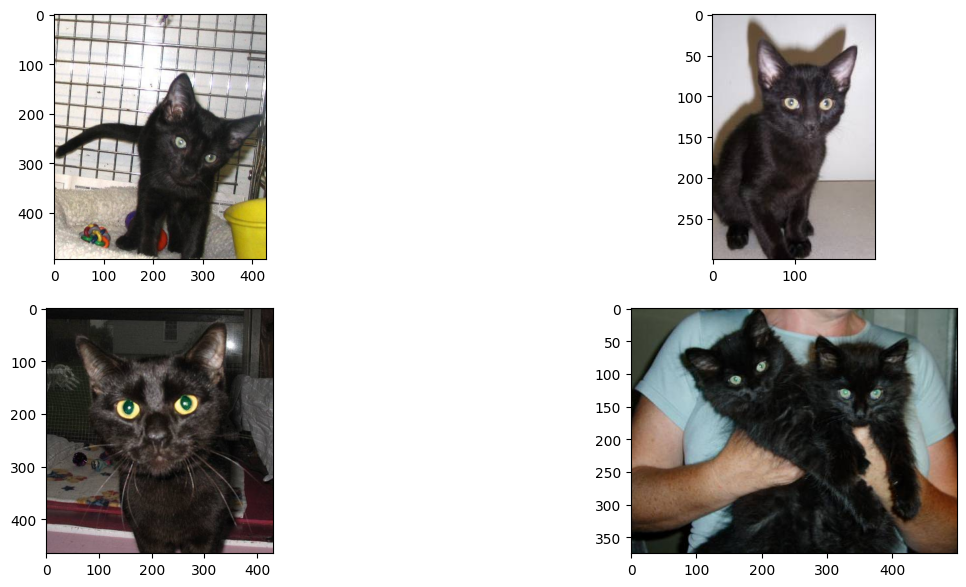

In [ ]:
plt.figure(figsize=(15,7))
for i, c in enumerate(np.random.randint(0, len(cat),4),start=1):
  im = img.imread('./train/'+ cat[c])
  print(im.shape)
  plt.subplot(2,2,i)
  plt.imshow(im)

plt.show()

In [ ]:
!ls -ltr ./train

Streaming output truncated to the last 5000 lines.
-rw-r--r-- 1 root root 63050 Oct 18 09:43 dog.55.jpg
-rw-r--r-- 1 root root  4826 Oct 18 09:43 dog.550.jpg
-rw-r--r-- 1 root root 24866 Oct 18 09:43 dog.5499.jpg
-rw-r--r-- 1 root root 30379 Oct 18 09:43 dog.5501.jpg
-rw-r--r-- 1 root root 44699 Oct 18 09:43 dog.5500.jpg
-rw-r--r-- 1 root root  7717 Oct 18 09:43 dog.5504.jpg
-rw-r--r-- 1 root root 21938 Oct 18 09:43 dog.5503.jpg
-rw-r--r-- 1 root root 25140 Oct 18 09:43 dog.5502.jpg
-rw-r--r-- 1 root root 19899 Oct 18 09:43 dog.5507.jpg
-rw-r--r-- 1 root root  8554 Oct 18 09:43 dog.5506.jpg
-rw-r--r-- 1 root root 26625 Oct 18 09:43 dog.5505.jpg
-rw-r--r-- 1 root root 27390 Oct 18 09:43 dog.551.jpg
-rw-r--r-- 1 root root 25600 Oct 18 09:43 dog.5509.jpg
-rw-r--r-- 1 root root  9154 Oct 18 09:43 dog.5508.jpg
-rw-r--r-- 1 root root 16116 Oct 18 09:43 dog.5512.jpg
-rw-r--r-- 1 root root 13470 Oct 18 09:43 dog.5511.jpg
-rw-r--r-- 1 root root 13884 Oct 18 09:43 dog.5510.jpg
-rw-r--r-- 1 root 

(374, 500, 3)
(374, 500, 3)
(336, 447, 3)
(375, 499, 3)


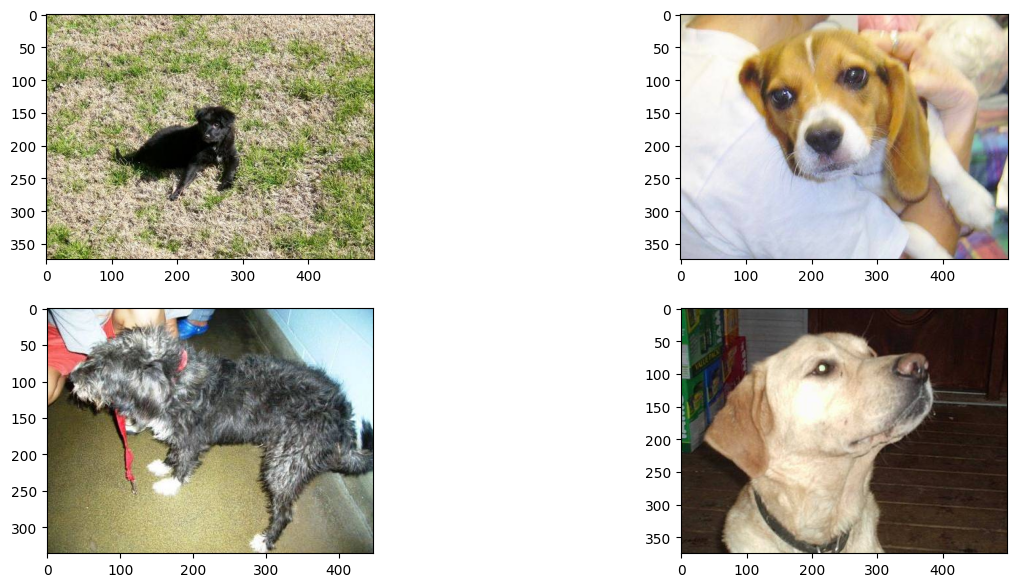

In [ ]:
plt.figure(figsize=(15,7))
for i, c in enumerate(np.random.randint(0, len(dog),4),start=1):
  im = img.imread('./train/'+ dog[c])
  print(im.shape)
  plt.subplot(2,2,i)
  plt.imshow(im)

plt.show()

# split the data    

In [ ]:
from sklearn.model_selection import train_test_split
train_set, valid_set = train_test_split(df, test_size=0.2, random_state=seed)

In [ ]:
train_set.shape, valid_set.shape

((20000, 2), (5000, 2))

In [ ]:
sns.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

train set distribution:
 label
dog    10013
cat     9987
Name: count, dtype: int64
valid set distribution:
 label
cat    2513
dog    2487
Name: count, dtype: int64



<ipython-input-22-e0e730e28e5a>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=train_set['label'],order=['dog','cat'], palette='rocket')
<ipython-input-22-e0e730e28e5a>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=valid_set['label'],order=['dog','cat'], palette='cubehelix')


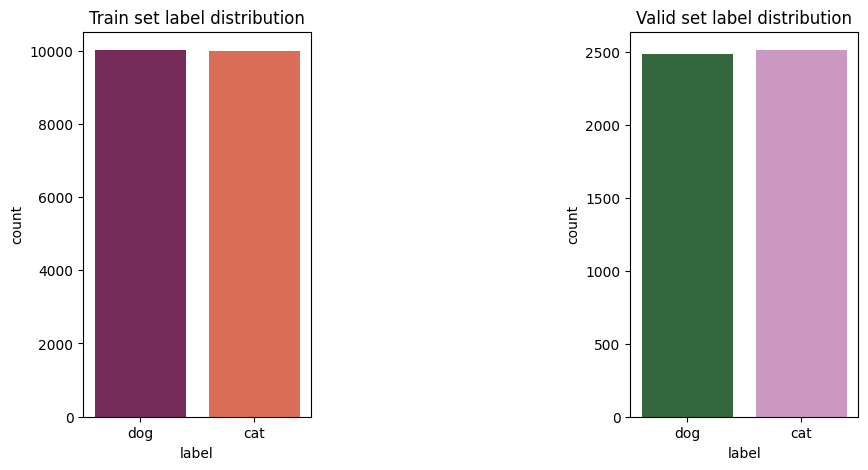

In [ ]:
print('train set distribution:\n',train_set['label'].value_counts())
print('valid set distribution:\n',valid_set['label'].value_counts())
print()

plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
sns.countplot(x=train_set['label'],order=['dog','cat'], palette='rocket')
plt.title('Train set label distribution')

plt.subplot(1,3,3)
sns.countplot(x=valid_set['label'],order=['dog','cat'], palette='cubehelix')
plt.title('Valid set label distribution')
plt.show()

#Image Data Genrator and Data Augmentation

A generator function in Python is defined like a normal function, but whenever it needs to generate a value, it does so with the yield keyword rather than return. If the body of a def contains yield, the function automatically becomes a Python generator function.

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
WIDTH, HEIGHT = 150 ,150
BATCH_SIZE = 32

In [ ]:
#ML model--> clean
#Data augmentation

# rotate the image
# zoom
# flip
shift left or right

SyntaxError: invalid syntax (<ipython-input-24-e5c789a41820>, line 7)

#Data augmentation is a technique that uses existing data to create new data samples to train machine learning (ML) models:
Data augmentation can:
Increase dataset size: Create more data samples to train ML models
Improve model robustness: Make models more accurate and robust
Reduce overfitting: Prevent overfitting of the model
Correct imbalanced datasets: Fix datasets that are not balanced

In [ ]:
train_genrator = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,    # zoom in
    zoom_range=0.2      # zoom out
  )


training_data = train_genrator.flow_from_dataframe( # Changed train_datagenerator to train_genrator
    dataframe = train_set,
    directory = '/content/train',
    x_col = 'file_name',   # predictors
    y_col = 'label',       # target
    target_size = (WIDTH,HEIGHT),
    class_mode = 'categorical',   #if i mention binary then in CNN model in output laye i have to use sigmoid avtivation function
    batch_size = BATCH_SIZE
)

Found 20000 validated image filenames belonging to 2 classes.


In [ ]:
training_data.class_indices

{'cat': 0, 'dog': 1}

In [ ]:
training_data.filenames[:10]

['cat.7702.jpg',
 'dog.5378.jpg',
 'dog.1972.jpg',
 'dog.9464.jpg',
 'dog.12426.jpg',
 'dog.11950.jpg',
 'cat.6121.jpg',
 'dog.3326.jpg',
 'dog.3924.jpg',
 'dog.8289.jpg']

In [ ]:
# new_dict={}
# for key, value in training_data.class.indices.item():
# new_dict[value] = key

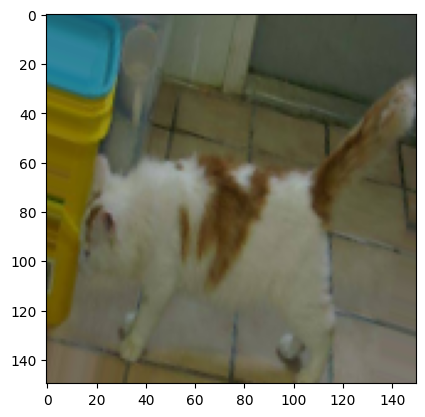

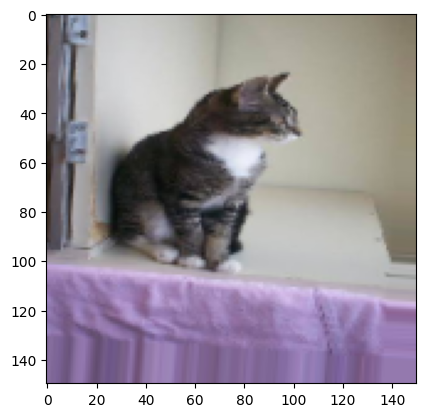

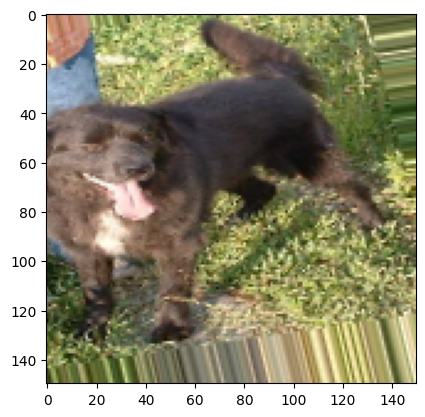

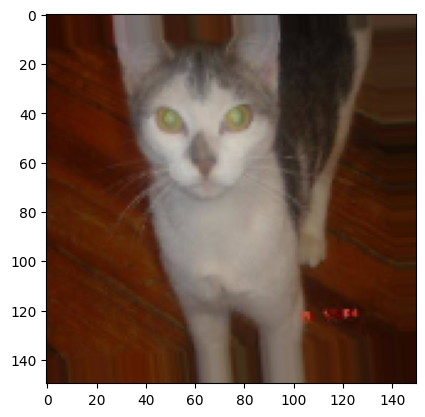

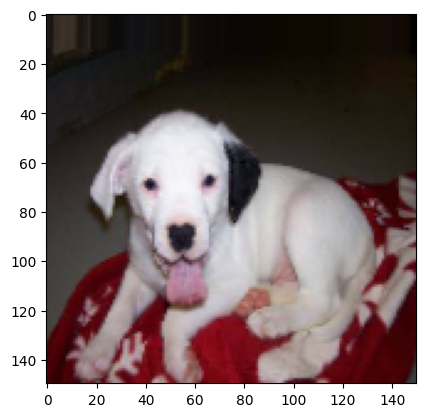

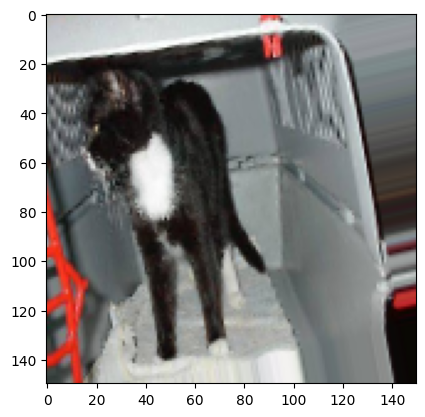

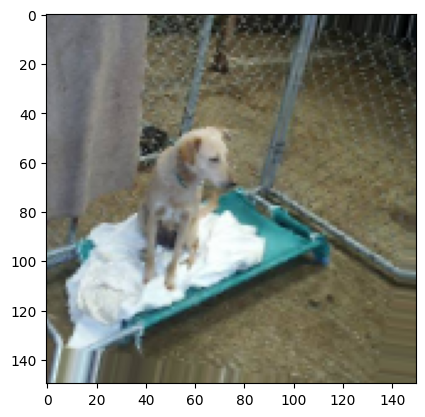

In [ ]:
for i in range(len(training_data.filenames)):
  image,label = next(training_data) # Use next(training_data) to get the next item from the iterator

  # display the image from the iterator
  plt.imshow(image[0])
  # print (new_dict[label[0]])
  plt.show()
  if i>5:
    break



In [ ]:
# validation data

valid_datagenerator = ImageDataGenerator(rescale=1./255)
validtion_data = valid_datagenerator.flow_from_dataframe(
     dataframe = valid_set, # Changed vaild_set to valid_set
    directory = '/content/train',
    x_col = 'file_name',   # predictors
    y_col = 'label',       # target
    target_size = (WIDTH,HEIGHT),
    class_mode = 'categorical',   #if i mention binary then in CNN model in output laye i have to use sigmoid avtivation function
    batch_size = BATCH_SIZE
)


Found 5000 validated image filenames belonging to 2 classes.


#Making CNN Model

In [ ]:
from tensorflow.keras.layers import *
from functools import partial # Fixed typo: functool to functools


DefaultConv2D = partial(keras.layers.Conv2D, kernel_size=3, activation='relu', padding='SAME')

model = keras.models.Sequential()

model.add(DefaultConv2D(filters=32,kernel_size=5, input_shape=[WIDTH,HEIGHT,3]))
model.add(MaxPooling2D(pool_size=2))

model.add(DefaultConv2D(filters=64))
model.add(DefaultConv2D(filters=64))
model.add(MaxPooling2D(pool_size=2))

model.add(DefaultConv2D(filters=128))
model.add(DefaultConv2D(filters=128))
model.add(MaxPooling2D(pool_size=2))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(2, activation='softmax'))  # Use softmax for two classes


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 150, 150, 32)        │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 75, 75, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 75, 75, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 75, 75, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 37, 37, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 37, 37, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 37, 37, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 18, 18, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 41472)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       2,654,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,935,714 (11.20 MB)

 Trainable params: 2,935,714 (11.20 MB)

 Non-trainable params: 0 (0.00 B)

# first 2 layer doing dimention reduction
# 2 probability of output

#AlexNet is a convolutional neural network (CNN) architecture that was designed to classify images

#Callbacks
## callbacks are added fucntinalitythat you can add in your training.

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
import datetime
earlystop_cb= EarlyStopping(patience=10, restore_best_weights=True)

reduce_lr_cb= ReduceLROnPlateau(factor=0.5, patience=5,monitor ='val_loss',min_lr=0.0001)
checkpiont_cb = ModelCheckpoint('Model.keras',save_best_only=True) # Changed the file extension to '.keras'

callbacks=[earlystop_cb, reduce_lr_cb,checkpiont_cb]


# Train the model

In [ ]:
opt=keras.optimizers.SGD(learning_rate=0.01)   #it will keep the learning rate variable when the model stuck in local loss momentum will help it will only used in SGD
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [ ]:
!pip install scikit-learn
import sklearn.preprocessing #Removed extra indentation


In [ ]:
history = model.fit(training_data,
    validation_data=validtion_data,
    epochs=10,
    validation_steps =10,
    steps_per_epoch=10, # Changed 'step_per_epoch' to 'steps_per_epoch'
    callbacks=callbacks
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


10/10 ━━━━━━━━━━━━━━━━━━━━ 75s 7s/step - accuracy: 0.4766 - loss: 0.6988 - val_accuracy: 0.4812 - val_loss: 0.6945 - learning_rate: 0.0100
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 56s 6s/step - accuracy: 0.5209 - loss: 0.6966 - val_accuracy: 0.4844 - val_loss: 0.6947 - learning_rate: 0.0100
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 50s 5s/step - accuracy: 0.4924 - loss: 0.6964 - val_accuracy: 0.5281 - val_loss: 0.6928 - learning_rate: 0.0100
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 55s 5s/step - accuracy: 0.5077 - loss: 0.6938 - val_accuracy: 0.5375 - val_loss: 0.6921 - learning_rate: 0.0100
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 50s 5s/step - accuracy: 0.5723 - loss: 0.6923 - val_accuracy: 0.4875 - val_loss: 0.6922 - learning_rate: 0.0100
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 53s 5s/step - accuracy: 0.5444 - loss: 0.6922 - val_accuracy: 0.5219 - val_loss: 0.6914 - learning_rate: 0.0100
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 52s 5s/step - accuracy: 0.5031 - loss: 0.6946 - val_accuracy: 0.5500 - va

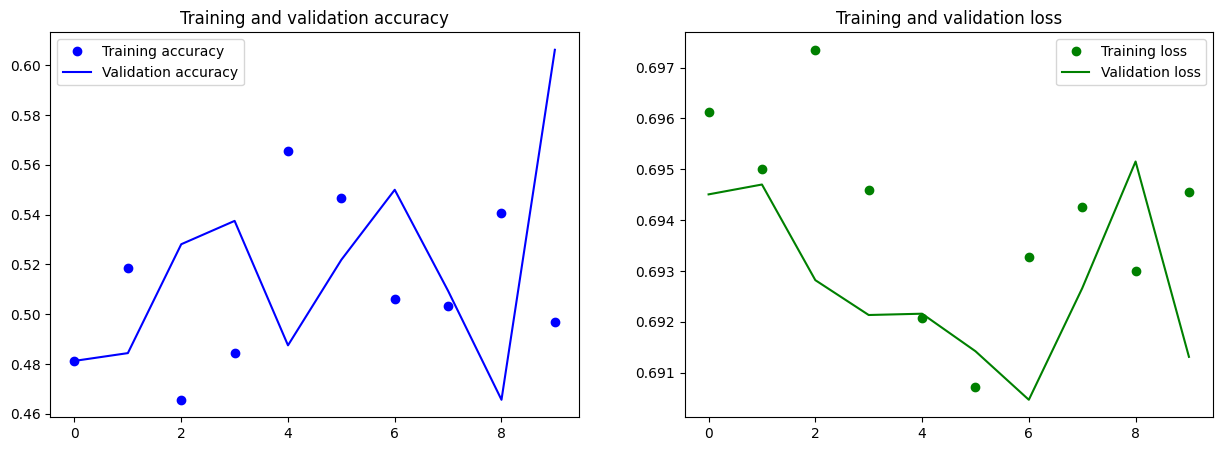

In [ ]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc))

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()


plt.subplot(1,2,2)
plt.plot(epochs,loss,'go',label='Training loss')
plt.plot(epochs,val_loss,'g',label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

# Evaluate model

In [ ]:
# Load the model, ensuring the file exists and you have the correct path
model1 = keras.models.load_model('Model.keras')

In [ ]:

test_loss, test_acc = model1.evaluate(validtion_data,steps=len(validtion_data),verbose=1)
print('loss: %.3f' % (test_loss))
print('accuracy: %.3f' % (test_acc * 100.0))

157/157 ━━━━━━━━━━━━━━━━━━━━ 191s 1s/step - accuracy: 0.5124 - loss: 0.6922
loss: 0.692
accuracy: 50.960


# the VGG Architructure works well on the data
so the next we'll doing to train VGG16 Architeture

# Transfer Learning

In [ ]:
import keras